In [1]:
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
iris = pd.read_csv("iris.csv", delimiter=";", encoding="latin-1")
iris

Longueur des sépales  Largeur des sépales  Longueur des pétales  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6                   1.4   
..                    ...                  ...                   ...   
145                   6.7                  3.0                   5.2   
146                   6.3                  2.5                   5.0   
147                   6.5                  3.0                   5.2   
148                   6.2                  3.4                   5.4   
149                   5.9                  3.0                   5.1   

     Largeur des pétales  Espèce  
0                    0.2       1  
1                    0.2       1  
2                    0.2       1  
3                    0.2       1  
4                    0.2       1  
..                   ...     ...  
145                  2.3       3  
146                  1.9       3  
147                  2.0       3  
148                  2.3       3  
149                  1.8       3  

[150 rows x 5 columns]

#### Je crée un dataframe qui va contenir toute les varibles sur les quel je souhaite faire mon clustering

In [3]:
X=iris[iris.columns[:-1]]

#### Lancement de l'algorithme
- Je choisi le nombre de groupes que je souhaite constituer
- Je stocke mon modèle dans la variable kmeans
- Je lance l'algorithme avec la méthode .fit_predict() et je récupère le tout dans la variable y_pred.

In [4]:
k = 3
clustering = KMeans(n_clusters=k, random_state=42)
y_pred = clustering.fit_predict(X)

In [5]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [6]:
clustering.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#### Je viens ajouter à mon dataframe les groupes identifiés et les centres de mes clusters.

In [7]:
iris['predict']=y_pred

In [8]:
centre = pd.DataFrame(clustering.cluster_centers_, columns=iris.columns[:-2])
centre[iris.columns[-2]] = -1
centre[iris.columns[-1]] = -1
iris = iris.append(centre)

In [9]:
iris

Longueur des sépales  Largeur des sépales  Longueur des pétales  \
0                5.100000             3.500000              1.400000   
1                4.900000             3.000000              1.400000   
2                4.700000             3.200000              1.300000   
3                4.600000             3.100000              1.500000   
4                5.000000             3.600000              1.400000   
..                    ...                  ...                   ...   
148              6.200000             3.400000              5.400000   
149              5.900000             3.000000              5.100000   
0                5.901613             2.748387              4.393548   
1                5.006000             3.428000              1.462000   
2                6.850000             3.073684              5.742105   

     Largeur des pétales  Espèce  predict  
0               0.200000       1        1  
1               0.200000       1        1  
2               0.200000       1        1  
3               0.200000       1        1  
4               0.200000       1        1  
..                   ...     ...      ...  
148             2.300000       3        2  
149             1.800000       3        0  
0               1.433871      -1       -1  
1               0.246000      -1       -1  
2               2.071053      -1       -1  

[153 rows x 6 columns]

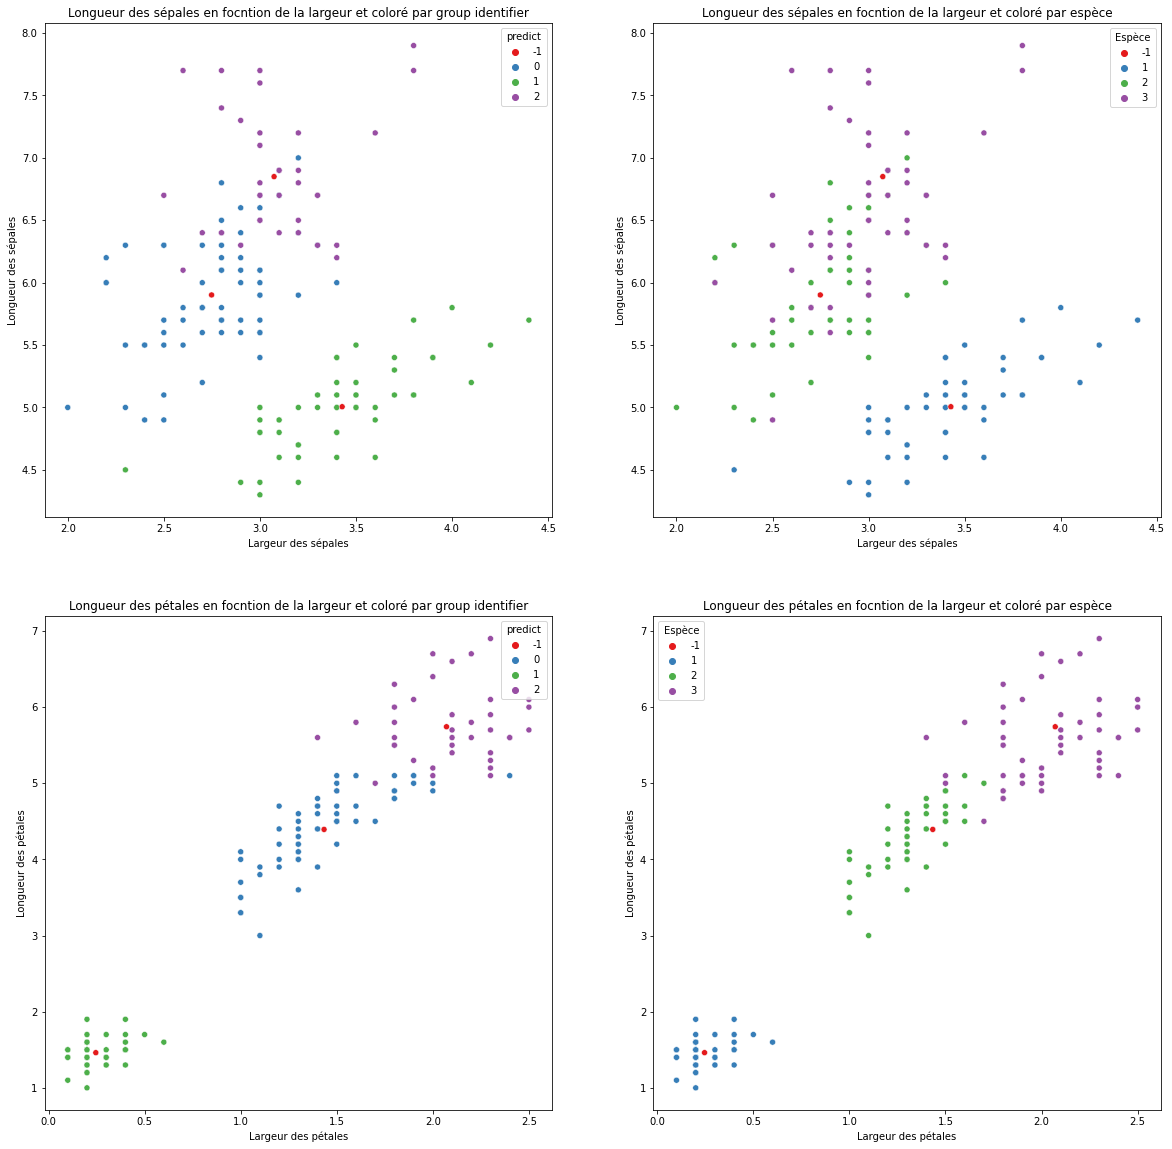

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

k = 3
clustering = KMeans(n_clusters=k, random_state=42)
y_pred = clustering.fit_predict(X)

plt.figure(figsize=[20,20])
plt.subplot(221)
sns.scatterplot(data=iris, y='Longueur des sépales', x='Largeur des sépales',
                hue='predict', palette="Set1")
plt.title("Longueur des sépales en focntion de la largeur et coloré par group identifier")

plt.subplot(222)
sns.scatterplot(data=iris, y='Longueur des sépales', x='Largeur des sépales',
                hue='Espèce', palette="Set1")
plt.title("Longueur des sépales en focntion de la largeur et coloré par espèce")


plt.subplot(223)
sns.scatterplot(data=iris, y='Longueur des pétales', x='Largeur des pétales',
                hue='predict', palette="Set1")
plt.title("Longueur des pétales en focntion de la largeur et coloré par group identifier")

plt.subplot(224)
sns.scatterplot(data=iris, y='Longueur des pétales', x='Largeur des pétales',
                hue='Espèce', palette="Set1")
plt.title("Longueur des pétales en focntion de la largeur et coloré par espèce")

plt.show()

In [11]:
clustering.inertia_

78.851441426146

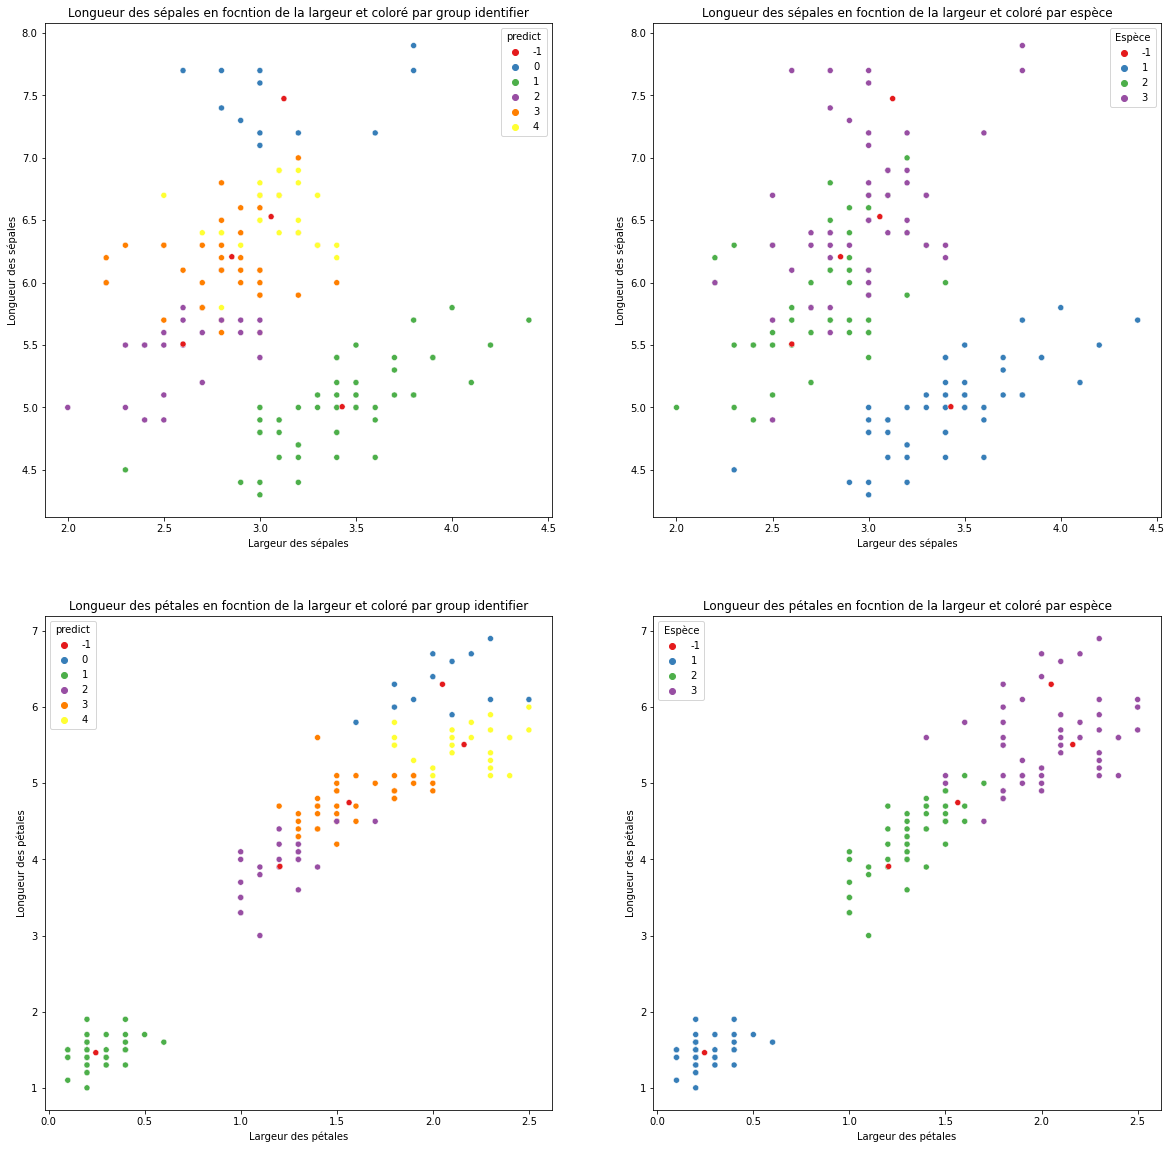

In [12]:
k = 5
clustering = KMeans(n_clusters=k, random_state=42)
y_pred = clustering.fit_predict(X)

iris = pd.read_csv("iris.csv", delimiter=";", encoding="latin-1")
iris["predict"]=y_pred

centre = pd.DataFrame(clustering.cluster_centers_, columns=iris.columns[:-2])
centre[iris.columns[-2]] = -1
centre[iris.columns[-1]] = -1
iris = iris.append(centre)

plt.figure(figsize=[20,20])
plt.subplot(221)
sns.scatterplot(data=iris, y='Longueur des sépales', x='Largeur des sépales',
                hue='predict', palette="Set1")
plt.title("Longueur des sépales en focntion de la largeur et coloré par group identifier")

plt.subplot(222)
sns.scatterplot(data=iris, y='Longueur des sépales', x='Largeur des sépales',
                hue='Espèce', palette="Set1")
plt.title("Longueur des sépales en focntion de la largeur et coloré par espèce")


plt.subplot(223)
sns.scatterplot(data=iris, y='Longueur des pétales', x='Largeur des pétales',
                hue='predict', palette="Set1")
plt.title("Longueur des pétales en focntion de la largeur et coloré par group identifier")

plt.subplot(224)
sns.scatterplot(data=iris, y='Longueur des pétales', x='Largeur des pétales',
                hue='Espèce', palette="Set1")
plt.title("Longueur des pétales en focntion de la largeur et coloré par espèce")

plt.show()

In [13]:
clustering.inertia_

46.44618205128204

#### On peut standardisé les données pour compenser les différence d'échelle et utiliser un pipeline

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

k=4
model = make_pipeline(StandardScaler(),
                     KMeans(n_clusters=k, random_state=42))


model.fit_predict(X)

array([3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [17]:
cluster = [i for i in range(1,10)]
inertie = []

iris = pd.read_csv("iris.csv", delimiter=";", encoding="latin-1")
X=iris[iris.columns[:-1]]

for i in cluster:
    k = i
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    
    inertie.append(clustering.inertia_)

inertie

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.46949589883803,
 30.186555194805198,
 28.28937085137087]

In [ ]:
data = pd.DataFrame({'cluster':cluster, 'inertie':inertie})
sns.lineplot(data=data, x="cluster", y="inertie", marker='o')

<AxesSubplot:xlabel='cluster', ylabel='inertie'>

La courbe prend une forme coudée.

La partition en K = 3 classes est la dernière à induire un gain informationnel significatif (réduction inertie intra 
augmentation de l’inertie inter).
Il y a donc un faible inerêt à aller au dela de 3 clusters.

#### Score de silhouette 
Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. 

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, clustering.labels_)

0.33944886363937105

#### Mini-Batch K-Means

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

50.30392527629499

#### Pour les variables catégorieles

In [ ]:
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("donnees/bank-full.csv",
                   delimiter=";", na_values="unknown")

data=data.dropna()


In [ ]:
data["default"] = data["default"].apply(lambda x: 1 if x == "yes" else 0)
data["housing"] = data["housing"].apply(lambda x: 1 if x == "yes" else 0)
data["loan"] = data["loan"].apply(lambda x: 1 if x == "yes" else 0)
data["y"] = data["y"].apply(lambda x: 1 if x == "yes" else 0)

In [ ]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
data["month"] = data["month"].apply(lambda x: months.index(x))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def cluster_model(data, k, reduce=False, num_attribs = ["age", "default", "campaign", "balance", "housing", "loan", "duration", "day", "month", "pdays", "previous", "y"], cat_attribs = ["job", "marital", "education"]):
    num_pipeline = Pipeline([
            ('std_scaler', Normalizer()),
        ])
    kmeans = KMeans(n_clusters=k)

    full_pipeline = [
        ("transform", ColumnTransformer([
            ("num", num_pipeline, num_attribs),
            ("cat", OneHotEncoder(), cat_attribs),
        ])),
    ]
    if reduce:
        full_pipeline.append(("pca", PCA(n_components=2)))

    full_pipeline = Pipeline(full_pipeline)
    
    data_transformed = full_pipeline.fit_transform(data)

    c_pred = kmeans.fit_predict(data_transformed)

    return kmeans, data_transformed, c_pred

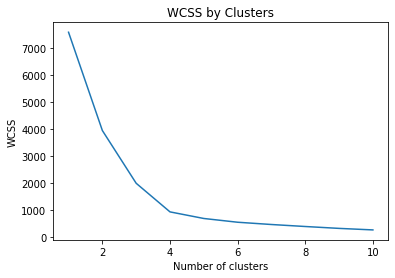

In [ ]:
# Create 10 models with 1 to 10 clusters
wcss = []
data_tr_list = []
c_pred_list = []
for i in range(1, 11):
    kmeans, data_transformed, c_pred = cluster_model(data, i, True)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    data_tr_list.append(data_transformed)
    c_pred_list.append(c_pred)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
data_cluster = pd.concat([pd.DataFrame(data_tr_list[3], columns=["X", "y"]), pd.DataFrame(c_pred_list[3], columns=["cluster"])], axis=1)

In [ ]:
def plot_clusters(data):
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data, x="X", y="y", hue="cluster", style="cluster", palette="pastel", s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

In [ ]:
plot_clusters(data_cluster)


# Without PCA

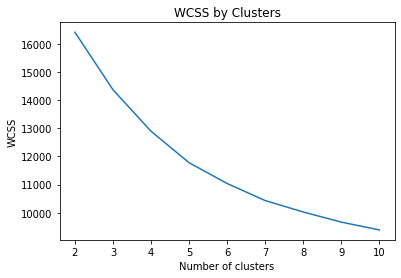

In [ ]:
# Create 10 models with 1 to 10 clusters
wcss_no_pca = []
data_tr_list_no_pca = []
c_pred_list_no_pca = []
kmeans_no_pca = []
silhouette_no_pca = []
for i in range(2, 11):
    kmeans, data_transformed, c_pred = cluster_model(data, i, False, num_attribs = ["age", "default", "campaign", "balance", "housing", "loan", "duration", "day", "month", "pdays", "previous"])
    # Get the WCSS (inertia) value
    kmeans_no_pca.append(kmeans)
    wcss_no_pca.append(kmeans.inertia_)
    silhouette_no_pca.append(silhouette_score(data_transformed, kmeans.labels_))
    data_tr_list_no_pca.append(data_transformed)
    c_pred_list_no_pca.append(c_pred)
    
#Plot the WCSS values onto a line graph
plt.plot(range(2, 11), wcss_no_pca)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
data_cluster_no_pca = pd.concat([data, pd.DataFrame(c_pred_list_no_pca[4], columns=["cluster"], index=data.index)], axis=1)
data_cluster_no_pca

age           job  marital  education  default  balance  housing  loan  \
24060   33        admin.  married   tertiary        0      882        0     0   
24062   42        admin.   single  secondary        0     -247        1     1   
24064   33      services  married  secondary        0     3444        1     0   
24072   36    management  married   tertiary        0     2415        1     0   
24077   36    management  married   tertiary        0        0        1     0   
...    ...           ...      ...        ...      ...      ...      ...   ...   
45199   34   blue-collar   single  secondary        0     1475        1     0   
45201   53    management  married   tertiary        0      583        0     0   
45204   73       retired  married  secondary        0     2850        0     0   
45208   72       retired  married  secondary        0     5715        0     0   
45210   37  entrepreneur  married  secondary        0     2971        0     0   

         contact  day  month  duration  campaign  pdays  previous poutcome  y  \
24060  telephone   21      9        39         1    151         3  failure  0   
24062  telephone   21      9       519         1    166         1    other  1   
24064  telephone   21      9       144         1     91         4  failure  1   
24072  telephone   22      9        73         1     86         4    other  0   
24077  telephone   23      9       140         1    143         3  failure  1   
...          ...  ...    ...       ...       ...    ...       ...      ... ..   
45199   cellular   16     10      1166         3    530        12    other  0   
45201   cellular   17     10       226         1    184         4  success  1   
45204   cellular   17     10       300         1     40         8  failure  1   
45208   cellular   17     10      1127         5    184         3  success  1   
45210   cellular   17     10       361         2    188        11    other  0   

       cluster  
24060        1  
24062        0  
24064        4  
24072        1  
24077        1  
...        ...  
45199        0  
45201        1  
45204        4  
45208        4  
45210        4  

[7842 rows x 18 columns]

In [ ]:
data_cluster_no_pca.groupby("cluster")["y"].value_counts(normalize=True, sort=False)

cluster  y
0        0    0.788462
         1    0.211538
1        0    0.722264
         1    0.277736
2        0    0.834862
         1    0.165138
3        0    0.685912
         1    0.314088
4        0    0.799009
         1    0.200991
5        0    0.832685
         1    0.167315
Name: y, dtype: float64

In [ ]:
data_cluster_no_pca["cluster"].value_counts(sort=False)

0    1300
4    2423
1    1325
5     514
2     981
3    1299
Name: cluster, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data_tr_list_no_pca[4], kmeans_no_pca[4].labels_)

0.24017870211031248

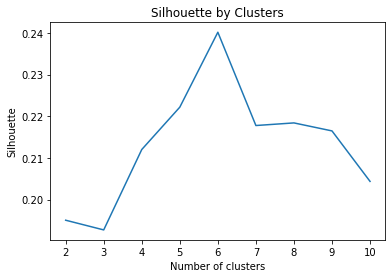

In [ ]:
#Plot the WCSS values onto a line graph
plt.plot(range(2, 11), silhouette_no_pca)
plt.title('Silhouette by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [ ]:
data_cluster_no_pca.groupby("cluster")[["age", "default"]].describe()

age                                                     default  \
          count       mean        std   min   25%   50%   75%   max   count   
cluster                                                                       
0        1300.0  32.933846   7.371914  18.0  28.0  32.0  37.0  73.0  1300.0   
1        1325.0  42.641509  10.593944  25.0  34.0  40.0  50.0  84.0  1325.0   
2         981.0  47.751274  13.471486  21.0  38.0  45.0  56.0  89.0   981.0   
3        1299.0  35.954580   8.622646  21.0  30.0  33.0  39.0  75.0  1299.0   
4        2423.0  42.947998  10.655778  22.0  35.0  41.0  50.0  88.0  2423.0   
5         514.0  44.554475   9.712332  27.0  37.0  43.0  52.0  79.0   514.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        0.014615  0.120054  0.0  0.0  0.0  0.0  1.0  
1        0.005283  0.072519  0.0  0.0  0.0  0.0  1.0  
2        0.005097  0.071246  0.0  0.0  0.0  0.0  1.0  
3        0.003849  0.061946  0.0  0.0  0.0  0.0  1.0  
4        0.004540  0.067239  0.0  0.0  0.0  0.0  1.0  
5        0.017510  0.131289  0.0  0.0  0.0  0.0  1.0